In [3]:
#importing libraries
import numpy as np
from PIL import Image
import os
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
scalar = preprocessing.StandardScaler()

In [5]:
cd "Second Semester"

[WinError 2] The system cannot find the file specified: 'Second Semester'
C:\Users\Amiya\Desktop\Second Semester\CSCE_633_Assignment_3\yalefaces


In [6]:
cd CSCE_633_Assignment_3/yalefaces/

[WinError 3] The system cannot find the path specified: 'CSCE_633_Assignment_3/yalefaces/'
C:\Users\Amiya\Desktop\Second Semester\CSCE_633_Assignment_3\yalefaces


In [7]:
#stacking input images to a single matrix
directory = os.getcwd()
inp_arr = np.zeros(25600)

In [8]:
for filename in os.listdir(directory):
    
    temp_image = Image.open(filename)
    temp_image = temp_image.resize((160,160))
    temp_arr = np.array(temp_image)
    temp_arr = temp_arr.flatten()
    inp_arr = np.vstack((inp_arr,temp_arr))
    
inp_arr = inp_arr[1:]
mean = np.mean(inp_arr,axis = 0)

for i in inp_arr:
    i -= mean
inp_arr = scalar.fit_transform(inp_arr)

In [6]:
#S = np.dot(inp_arr.transpose(),inp_arr)

In [7]:
#S.shape

In [9]:
#calculating singular value decomposition
P,eig_val,V = LA.svd(inp_arr.transpose())

In [10]:
P.shape

(25600, 25600)

In [11]:
#calculating the cummulative energy per eigen vector no.(k) increase
energy_vec = []
tot_lamda = np.sum(eig_val)
for i in range(len(P)):
    temp_eig = eig_val[0:i]
    temp_lambda = np.sum(temp_eig)
    energy = (temp_lambda/tot_lamda)*100
    energy_vec.append(energy)
    
#printing intital 50 elements of energy_vec
print(energy_vec[:50])

[0.0, 7.205504641304216, 12.890077099495834, 17.05567848195133, 20.667610999576937, 23.337618467081768, 25.82177174471772, 28.142851416293478, 30.266234932431647, 32.265712319487406, 34.04755871842225, 35.684913902576604, 37.199010616010916, 38.63139539259496, 39.98686867773926, 41.298611380796, 42.544621176288224, 43.768503878574535, 44.93204870041838, 46.07330482958034, 47.20706219211452, 48.296483773715956, 49.31818688647496, 50.28782974468123, 51.23770538497835, 52.17379299021355, 53.08504906384827, 53.98523184690427, 54.86412864061499, 55.733662661292094, 56.542634946659135, 57.314529701133075, 58.080992939047846, 58.834197666162744, 59.57628046346096, 60.29381689042307, 61.00153217544369, 61.69903153737003, 62.365879671332394, 63.02137572548059, 63.66197795934706, 64.29594201945211, 64.91338173121878, 65.5186391513868, 66.12086402696914, 66.7163476110637, 67.29207877489, 67.86079694175939, 68.41689145722137, 68.968424971381]


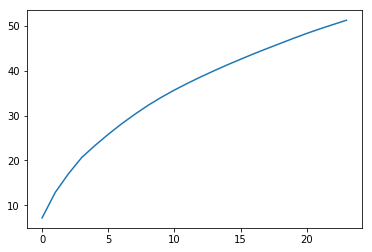

In [12]:
#plotting graph for cummilative energy per k
temp_energy = energy_vec[1:25]
plt.plot(temp_energy)


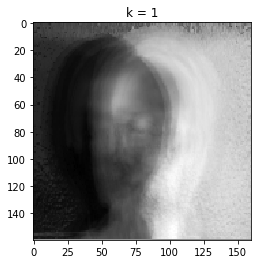

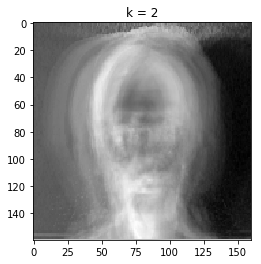

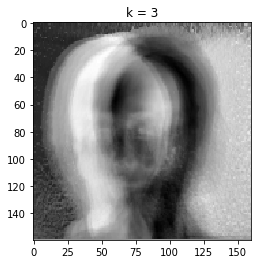

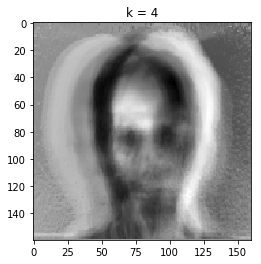

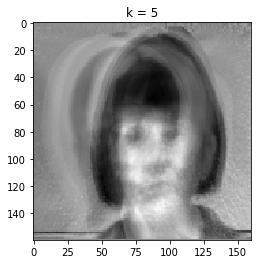

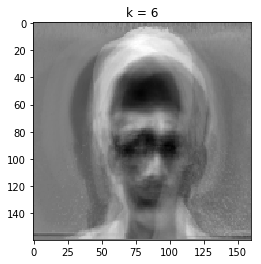

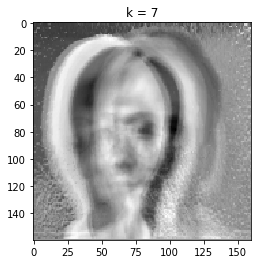

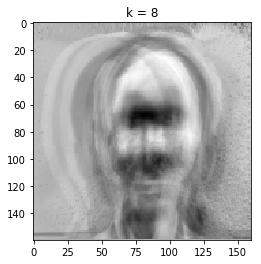

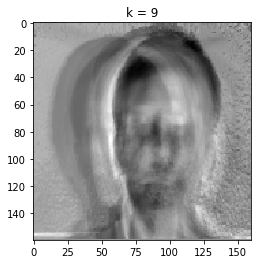

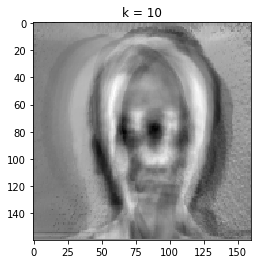

In [13]:
#plotting top 10 eignfaces 
for i in range(10):
    plt.imshow(P.real[:,i].reshape((160,160)), cmap = plt.cm.gray)
    plt.title('k = {}'.format(i+1))
    plt.show()

In [14]:
energy_vec

[0.0,
 7.205504641304216,
 12.890077099495834,
 17.05567848195133,
 20.667610999576937,
 23.337618467081768,
 25.82177174471772,
 28.142851416293478,
 30.266234932431647,
 32.265712319487406,
 34.04755871842225,
 35.684913902576604,
 37.199010616010916,
 38.63139539259496,
 39.98686867773926,
 41.298611380796,
 42.544621176288224,
 43.768503878574535,
 44.93204870041838,
 46.07330482958034,
 47.20706219211452,
 48.296483773715956,
 49.31818688647496,
 50.28782974468123,
 51.23770538497835,
 52.17379299021355,
 53.08504906384827,
 53.98523184690427,
 54.86412864061499,
 55.733662661292094,
 56.542634946659135,
 57.314529701133075,
 58.080992939047846,
 58.834197666162744,
 59.57628046346096,
 60.29381689042307,
 61.00153217544369,
 61.69903153737003,
 62.365879671332394,
 63.02137572548059,
 63.66197795934706,
 64.29594201945211,
 64.91338173121878,
 65.5186391513868,
 66.12086402696914,
 66.7163476110637,
 67.29207877489,
 67.86079694175939,
 68.41689145722137,
 68.968424971381,
 69.51

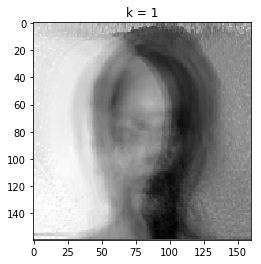

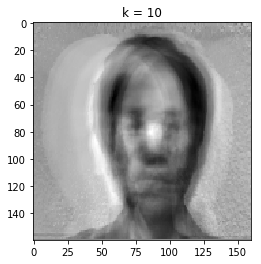

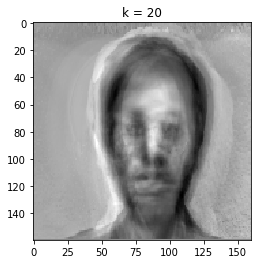

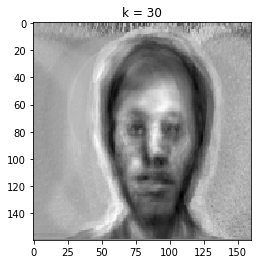

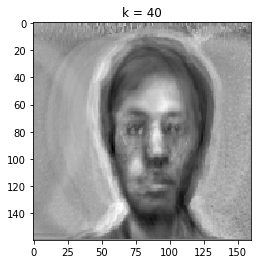

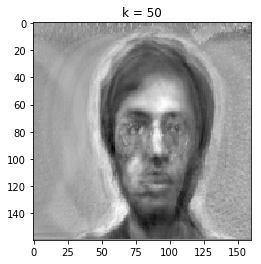

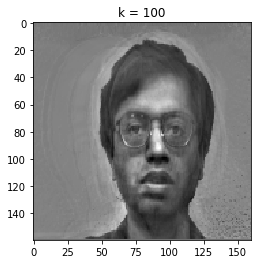

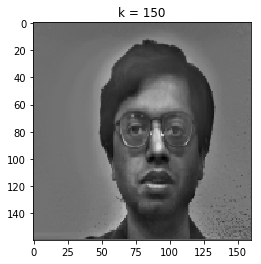

In [15]:
#Reconstruction of image from k eigenvectors

k = [1, 10, 20, 30, 40, 50, 100, 150]

for i in k:
    u = P.real[:,:i+1]
    temp = np.dot(inp_arr[100], P.real[:,:i+1])
    #print(temp.shape)
    temp = np.dot(u,temp) 
    plt.imshow(temp.reshape((160,160)), cmap = plt.cm.gray)
    plt.title('k = {}'.format(i))
    plt.show()